In [0]:
#Carregando a imagem
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/My Drive/rainbow.png" "rainbow.png"
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Buda.jpg  drive  rainbow.jpg  sample_data


In [11]:
#Importações gerais
#import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

1. Desenvolva um sistema para abrir, exibir, manipular e salvar imagens RGB com 24
bits/pixel (8 bits/componente/pixel). Não use bibliotecas ou funções especiais de processamento de imagens. Para os itens 1.3 a 1.8, duas formas de aplicação devem ser testadas: em RGB (banda a banda) e na banda Y, com posterior conversão para RGB. <br>

Bits para cada unsigned int de RGB: uint8


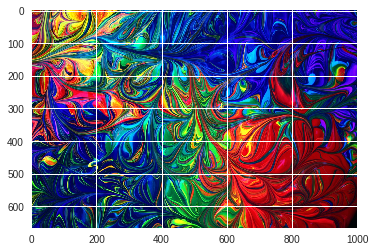

In [0]:
#Carregando a imagem na memória, exemplo:
def carregaRGB(img_file):
  img = cv2.imread(img_file, 3) #Ela vem com a sequência de bgr ao invés de rgb
  b,g,r = cv2.split(img)
  img = cv2.merge([r,g,b])
  return img
rainbowRGB = carregaRGB("rainbow.png")
print("Bits para cada unsigned int de RGB:", rainbowRGB.dtype)
plt.imshow(rainbowRGB)
plt.show()

O sistema deve ter as seguintes funcionalidade: <br>

1.1. Conversão RGB-YIQ-RGB (cuidado com os limites de R, G e B na volta!)(Douglas)<br>

In [0]:
#Converte uma imagem
def converteYIQ(imgRGB):
  
imgRGB = carregaRGB("rainbow.png")

1.2. Exibição de bandas individuais (R, G e B) como imagens monocromáticas ou
coloridas (em tons de R, G ou B, respectivamente)(Xerxes)<br>

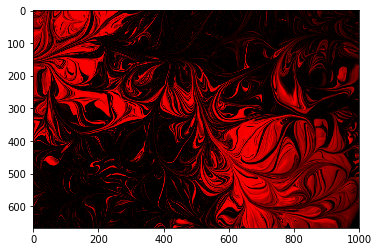

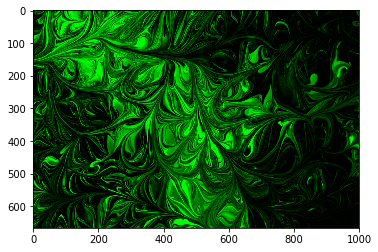

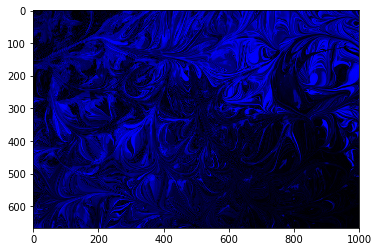

In [15]:
def separateRGB(img):

	#print('Iniciando separação de imagem...')
    
	#Pegamos cada 'Valor' em pixels
	data = img.getdata()
	#print('Data:', data)

	#Vamos então suprimir cada uma das bandas((255, 120, 65) -> (0, 120, 0) para G)
	r = [(d[0], 0, 0) for d in data]#Mantemos o valor de Vermelho e zeramos os valores de Verde e Azul
    
	g = [(0, d[1], 0) for d in data]#Mantemos o valor de Verde e zeramos os valores de Vermelho e Azul
    
	b = [(0, 0, d[2]) for d in data]#Mantemos o valor de Azul e zeramos os valores de Vermelho e Verde

	#Salva imagens em R, G e B
	img.putdata(r)#Mudamos apenas os valores para R
	imgRed = img.copy()
    
	img.putdata(g)#Mudamos apenas os valores para G
	imgGreen = img.copy()
    
	img.putdata(b)#Mudamos apenas os valores para B
	imgBlue = img.copy()

	#print('Conversão Completa!')

	return r, g, b, imgRed, imgGreen, imgBlue

img = Image.open('rainbow.png')

r, g, b, imgRed, imgGreen, imgBlue = separateRGB(img)

plt.imshow(imgRed)
plt.show()

plt.imshow(imgGreen)
plt.show()

plt.imshow(imgBlue)
plt.show()

1.3. Negativo(Rebeca)<br>

In [0]:
def negativeFilter(img_file):
  
  print('Aplicando filtro negativo...')
  
  r,g,b = separateRGB(img_file)

  r = 255 - r
  g = 255 - g
  b = 255 - b

  negativeImg = cv2.merge([r, g, b])

1.4. Controle de brilho aditivo (valor do pixel resultante = valor do pixel original + c, c
inteiro) (cuidado com os limites de R, G e B!)(Pedro)<br>

1.5. Controle de brilho multiplicativo (valor do pixel resultante = valor do pixel original
x c, c real não negativo) (cuidado com os limites de R, G e B!)(Douglas)<br>

1.6. Convolução m x n com bias (viés, offset). Testar com filtros Média e Sobel. (Xerxes)<br>

1.7. Filtro mediana m x n. (Rebeca) <br>

1.8. Limiarização com limiar m escolhido pelo usuário. (Pedro)<br>